In [2]:
import os

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplolib inline

from PIL import Image
import glob

UsageError: Line magic function `%matplolib` not found.


In [3]:
DATA_DIR = 'C:/Users/Junya/Desktop/dataset_atmaCup11'

csv_list = [csv_file_name for csv_file_name in os.listdir(DATA_DIR) if '.csv' in csv_file_name]
csv_list

['atmaCup#11_sample_submission.csv',
 'materials.csv',
 'techniques.csv',
 'test.csv',
 'train.csv']

In [4]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
mate = pd.read_csv(os.path.join(DATA_DIR, 'materials.csv'))
tech = pd.read_csv(os.path.join(DATA_DIR, 'techniques.csv'))

In [5]:
train.head(10)

,object_id,sorting_date,art_series_id,target
0,002bff09b09998d0be65,1631,509357f67692a6a45626,1
1,00309fb1ef05416f9c1f,1900,7987b47bbe5dc3039179,3
2,003a1562e97f79ba96dc,1834,ded7c3c9636708e5b14c,3
3,004890880e8e7431147b,1743,582ac2d7f0cef195b605,2
4,00718c32602425f504c1,1885,64c907f0c08dce4fb8e8,3
5,007c091616828798b5e1,1839,e9440b5eb4b77f1ce0e3,3
6,007f5e3620b458d77212,1640,b869fd8334a3a591084e,1
7,00990614b43285e49f4a,1893,8134b18cdc27af23e1a8,3
8,00bf812ffe8a62d45661,1720,3bfd41016d864e3fd8b5,2
9,00c93e990e799fb3d8c9,1775,2d29062fe2b09738757b,2


In [19]:
len(train), len(test), len(mate), len(tech)

(3937, 5919, 9081, 3777)

In [7]:
len(train['object_id'].unique())

3937

(array([  2.,   4.,   1.,   2.,   0.,   3.,   3.,   1.,   1.,   3.,  23.,
          4.,  13.,   9.,   2.,   7.,  10.,  19.,  15.,  32.,  13.,  34.,
          9.,  13.,  40.,  14.,  27.,  25.,  29., 143.,  59.,  15.,  78.,
         37.,  44.,  52.,  20.,  64.,  51.,  50.,  17.,  36.,  19.,  74.,
         58.,  18.,  14., 207.,  73.,  46.,  44.,  37.,  57.,  44.,  49.,
         51., 130.,  54.,  90.,  77., 203., 117., 194.,  97.,  75.,  65.,
         68.,  53.,  90.,  39.,  86.,  97.,  82.,  48.,  87.,  17.,  15.,
         72., 147.,  29.,  16.,  13.,  13.,  16.,  10.,   3.,   3.,   2.,
          1.,   4.,   3.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,
          1.]),
 array([1440.  , 1445.51, 1451.02, 1456.53, 1462.04, 1467.55, 1473.06,
        1478.57, 1484.08, 1489.59, 1495.1 , 1500.61, 1506.12, 1511.63,
        1517.14, 1522.65, 1528.16, 1533.67, 1539.18, 1544.69, 1550.2 ,
        1555.71, 1561.22, 1566.73, 1572.24, 1577.75, 1583.26, 1588.77,
        1594.28, 1599.79, 1605.3 ,

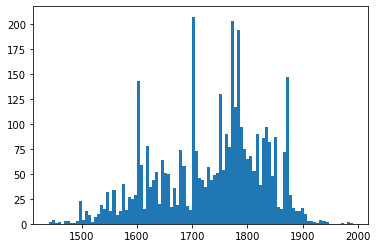

In [8]:
plt.hist(train['sorting_date'], bins=100)

In [9]:
mate['name'].value_counts()

paper                          3746
ink                            1589
chalk                          1509
pencil                         1135
watercolor (paint)              543
deck paint                      130
graphite (mineral)              122
prepared paper                   91
parchment (animal material)      61
paint (coating)                  43
gouache (paint)                  38
oil paint (paint)                33
cardboard                        18
tracing paper                     8
linen (material)                  3
leather                           2
India ink (ink)                   2
zinc                              1
varnish                           1
palm leaf (material)              1
wood (plant material)             1
gold leaf                         1
metal                             1
bristol board                     1
velvet (fabric weave)             1
Name: name, dtype: int64

In [10]:
tech['name'].value_counts()

brush                   2179
pen                     1569
counterproof              17
chalk                      3
pencil                     2
snipping                   2
engraving                  2
letterpress printing       1
sewing                     1
scoring                    1
Name: name, dtype: int64

In [11]:
train['target'].value_counts()

2    1511
3    1055
1     896
0     475
Name: target, dtype: int64

In [75]:
one_hot_mate = pd.get_dummies(mate, columns=['name'])
one_hot_mate = one_hot_mate.set_index('object_id')
one_hot_mate = one_hot_mate.sum(level=0).reset_index()

In [86]:
for index, row in one_hot_mate.iterrows():
    print(index, row.drop('object_id').values)
    break

0 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
new_name = {}
for name in one_hot_mate:
    new_name[name] = name.strip('name_')

one_hot_mate = one_hot_mate.rename(columns=new_name)

<AxesSubplot:>

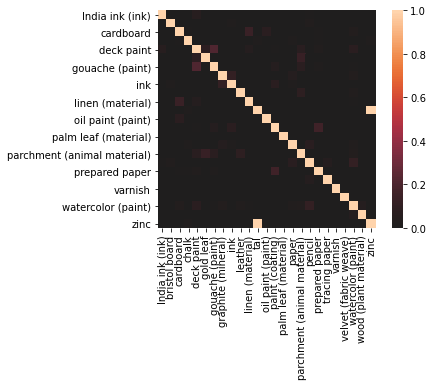

In [116]:
df_corr = one_hot_mate.drop('object_id', axis=1).corr()
sns.heatmap(df_corr, square=True, vmax=1, vmin=0, center=0)

In [100]:
import torch
def pred_acc(original, predicted):
    # ref: https://pytorch.org/docs/stable/torch.html#module-torch
    return torch.round(predicted).eq(original).sum().numpy()/len(original)

In [103]:
acc = pred_acc(torch.tensor([0,0,1,1,0]), torch.tensor([0.03, 0.1, 0.0, 0.99, 0.2]))

In [104]:
acc

0.8